In [ ]:
!pip install bertopic
!pip install datasets
!python -m spacy download ru_core_news_sm

## EDA

In [7]:
import pandas as pd

data = pd.read_csv("df_extra_gen_old.csv")
data.head()

,url,title,text,topic,tags,date,Красота,Политика,Экономика,Мода,...,Дом,Технологии,Транспорт,X,Погода,Рецепты,Опросы,Головоломки,labels,actual_labels
0,https://lenta.ru/news/2016/01/21/jeans/,Ирина Шейк разделась для рекламы джинсов,Российская супермодель Ирина Шейк приняла учас...,Ценности,Стиль,2016/01/21,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,Ирина Шейк разделась для рекламы джинсов Росси...,0.0,0.0,0.0,0.0,"[0, 3, 10]","[0, 3, 10]"
1,https://lenta.ru/news/2017/01/11/z_zegna/,Бренд Z Zegna вдохновился лыжниками 1970-х годов,Итальянская марка Z Zegna представила новую ко...,Ценности,Стиль,2017/01/11,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,Бренд Z Zegna вдохновился лыжниками 1970-х год...,0.0,0.0,0.0,0.0,"[0, 3, 10]","[0, 3, 10]"
2,https://lenta.ru/news/2016/03/07/kors/,Бренд Michael Kors представил «золотые» ароматы,Модный бренд Michael Kors представил новую лин...,Ценности,Внешний вид,2016/03/07,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,Бренд Michael Kors представил «золотые» аромат...,0.0,0.0,0.0,0.0,"[0, 3, 10]","[0, 3, 10]"
3,https://lenta.ru/news/2017/04/26/mostod/,Tod’s сшил обувь москвичам и петербуржцам,Итальянская марка Tod's выпустила лимитированн...,Ценности,Стиль,2017/04/26,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,Tod’s сшил обувь москвичам и петербуржцам Итал...,0.0,0.0,0.0,0.0,"[0, 3, 10]","[0, 3, 10]"
4,https://lenta.ru/news/2018/01/30/painterman/,Киркорова засмеяли за штаны Supreme и сравнили...,Российский певец Филипп Киркоров опубликовал в...,Ценности,Стиль,2018/01/30,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,Киркорова засмеяли за штаны Supreme и сравнили...,0.0,0.0,0.0,0.0,"[0, 3, 10]","[0, 3, 10]"


In [12]:
from ast import literal_eval

df = data[['text', 'actual_labels']]
df['actual_labels'] = df['actual_labels'].apply(literal_eval)
df = df.explode('actual_labels')
df.head(10)

<ipython-input-12-6b50763846d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actual_labels'] = df['actual_labels'].apply(literal_eval)


,text,actual_labels
0,Российская супермодель Ирина Шейк приняла учас...,0
0,Российская супермодель Ирина Шейк приняла учас...,3
0,Российская супермодель Ирина Шейк приняла учас...,10
1,Итальянская марка Z Zegna представила новую ко...,0
1,Итальянская марка Z Zegna представила новую ко...,3
1,Итальянская марка Z Zegna представила новую ко...,10
2,Модный бренд Michael Kors представил новую лин...,0
2,Модный бренд Michael Kors представил новую лин...,3
2,Модный бренд Michael Kors представил новую лин...,10
3,Итальянская марка Tod's выпустила лимитированн...,0


In [13]:
label2num = {
    'Красота': 0, 'Политика': 1, 'Экономика': 2, 'Мода': 3,
    'Общество': 4, 'Закон и право': 5, 'Кино': 6, 'Телевидение': 7,
    'Персоны': 8, 'События': 9, 'Бренды': 10, 'Наука': 11,
    'Гаджеты': 12, 'Соцсети': 13, 'Дом': 14, 'Технологии': 15,
    'Транспорт': 16, 'Погода': 17, 'Рецепты': 18, 'Опросы': 19, 'Головоломки': 20
}

num2label = {
    0 : 'Красота', 1 : 'Политика', 2 : 'Экономика', 3 : 'Мода',
    4 : 'Общество', 5 : 'Закон и право', 6 : 'Кино', 7 : 'Телевидение',
    8 : 'Персоны', 9 : 'События', 10 : 'Бренды', 11 : 'Наука',
    12 : 'Гаджеты', 13 : 'Соцсети', 14 : 'Дом', 15 : 'Технологии',
    16 : 'Транспорт', 17 : 'Погода', 18 : 'Рецепты', 19 : 'Опросы', 20 : 'Головоломки'
}

In [15]:
result_df = pd.DataFrame()
data_counts = {}
for target_value in df['actual_labels'].unique():
    target_rows = df[df['actual_labels'] == target_value]#.head(10000)
    result_df = pd.concat([result_df, target_rows], ignore_index=True)
    data_counts[num2label[target_value]] = len(target_rows)
    print(f"{num2label[target_value]}: line counts = {data_counts[num2label[target_value]]}")
print(f"Data shape = {result_df.shape}")

Красота: line counts = 2890
Мода: line counts = 2890
Бренды: line counts = 2895
Политика: line counts = 10603
Закон и право: line counts = 30654
Наука: line counts = 6746
Гаджеты: line counts = 3765
Технологии: line counts = 3765
Соцсети: line counts = 7855
Дом: line counts = 4544
Транспорт: line counts = 1314
Погода: line counts = 800
Рецепты: line counts = 754
Опросы: line counts = 780
Экономика: line counts = 9029
Телевидение: line counts = 15078
Головоломки: line counts = 753
Общество: line counts = 23357
Персоны: line counts = 14210
Кино: line counts = 7558
События: line counts = 2959
Data shape = (153199, 2)


In [16]:
texts = result_df.text.to_list()

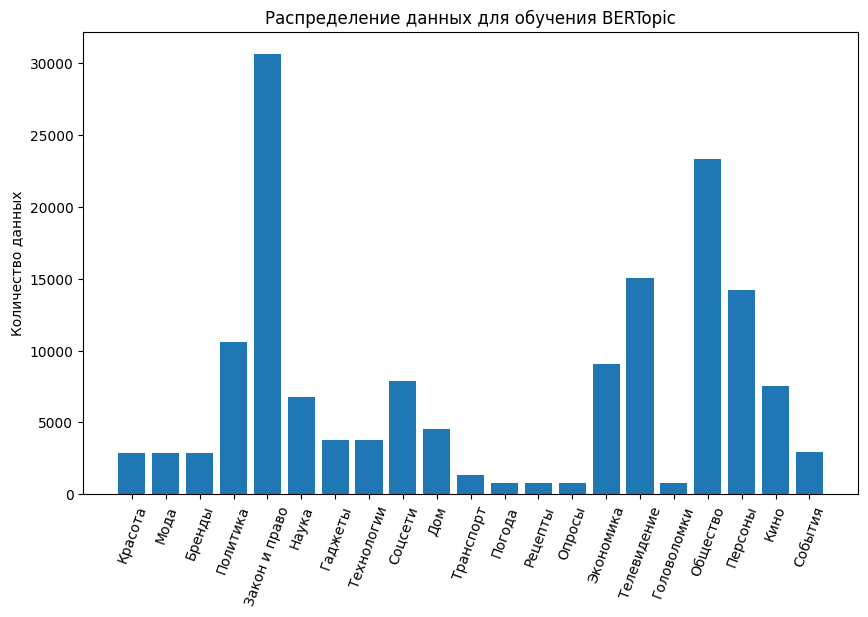

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(list(data_counts.keys()), list(data_counts.values()))
plt.xticks(rotation=70)
plt.title("Распределение данных для обучения BERTopic")
plt.ylabel("Количество данных")
plt.show()

## Model training

In [18]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-mpnet-base-v2")

embeddings = embedding_model.encode(texts, show_progress_bar=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Batches:   0%|          | 0/4788 [00:00<?, ?it/s]

In [19]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

In [20]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=150, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(min_df=2, ngram_range=(1, 2))

In [22]:
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech

# KeyBERT
keybert_model = KeyBERTInspired()

# Part-of-Speech
pos_model = PartOfSpeech("ru_core_news_sm")

# MMR
mmr_model = MaximalMarginalRelevance(diversity=0.3)

# All representation models
representation_model = {
    "KeyBERT": keybert_model,
    # "MMR": mmr_model,
    "POS": pos_model
}

In [23]:
from bertopic import BERTopic

topic_model = BERTopic(
  # Pipeline models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  representation_model=representation_model,
  # Hyperparameters
  top_n_words=10,
  verbose=True
)

topics, probs = topic_model.fit_transform(texts, embeddings)

2024-04-21 10:50:22,018 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-21 10:56:28,328 - BERTopic - Dimensionality - Completed ✓
2024-04-21 10:56:28,335 - BERTopic - Cluster - Start clustering the reduced embeddings
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
2024-04-21 10:57:03,727 - BERTopic - Cluster - Completed ✓
2024-04-21 10:57:03,761 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-21 11:01:16,436 - BERTopic - Representation - Completed ✓


In [24]:
topic_model.get_topic_info(0)

,Topic,Count,Name,Representation,KeyBERT,POS,Representative_Docs
0,0,13961,0_по_на_его_что,"[по, на, его, что, суд, он, из, не, дело, об]","[возбуждено уголовное, уголовное дело, уголовн...","[суд, дело, года, рублей, дела, следствия, отн...",[В суд направлено дело в отношении бывшего нач...


In [26]:
topic_model.get_topic(1, full=True)

{'Main': [('google', 0.0077839185212117724),
  ('пользователей', 0.007398989001841446),
  ('интернет', 0.007177004996335227),
  ('на', 0.0062728331824796315),
  ('что', 0.0060666767386878505),
  ('для', 0.005746162272718713),
  ('по', 0.00568406370559917),
  ('компании', 0.005500567114204845),
  ('не', 0.005466516414637161),
  ('доступ', 0.0051127901313895606)],
 'KeyBERT': [('google', 0.6043844),
  ('интернете', 0.48209977),
  ('интернета', 0.44574285),
  ('сайтов', 0.44068006),
  ('сайты', 0.43550968),
  ('интернет', 0.43455848),
  ('яндекс', 0.41509247),
  ('сайте', 0.40927976),
  ('twitter', 0.39932448),
  ('сайт', 0.39803377)],
 'POS': [('пользователей', 0.007398989001841446),
  ('интернет', 0.007177004996335227),
  ('компании', 0.005500567114204845),
  ('доступ', 0.0051127901313895606),
  ('данных', 0.004222017069275931),
  ('года', 0.004122715087394353),
  ('информации', 0.0037912270160875834),
  ('данные', 0.0037742355070821774),
  ('сайт', 0.00311354501645437),
  ('информацию'

In [28]:
new_topics = topic_model.reduce_outliers(texts, topics)
new_topics = topic_model.reduce_outliers(texts, topics, strategy="embeddings", embeddings=embeddings)
topic_model.update_topics(texts, topics=new_topics)

100%|██████████| 57/57 [03:06<00:00,  3.26s/it]
2024-04-21 11:06:13,500 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [53]:
final = topic_model.get_topic_info()[['Topic', 'KeyBERT', 'POS']]
final['kws'] = final['KeyBERT'] + final['POS']

final.at[7,'kws'] = []

final[['Topic', 'kws']].to_csv('BERTopic_mapping.csv')

from google.colab import files
files.download('BERTopic_mapping.csv')

final.head(10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Topic,KeyBERT,POS,kws
0,0,"[возбуждено уголовное, уголовное дело, уголовн...","[суд, дело, года, рублей, дела, следствия, отн...","[возбуждено уголовное, уголовное дело, уголовн..."
1,1,"[google, интернете, интернета, сайтов, сайты, ...","[пользователей, интернет, компании, доступ, да...","[google, интернете, интернета, сайтов, сайты, ..."
2,2,"[самолета, самолет, самолете, самолетов, борту...","[самолет, самолета, борту, авиакомпании, пасса...","[самолета, самолет, самолете, самолетов, борту..."
3,3,"[звездные войны, трилогии, звездных войн, игры...","[фильма, роль, фильм, картины, сериала, фильме...","[звездные войны, трилогии, звездных войн, игры..."
4,4,"[гены, генов, ученые из, миллионов лет, ученые...","[ученые, журнале, исследователи, университета,...","[гены, генов, ученые из, миллионов лет, ученые..."
5,5,"[авария произошла, аварии, авария, результате ...","[водитель, аварии, результате, автобуса, автом...","[авария произошла, аварии, авария, результате ..."
6,6,"[iphone plus, iphone, apple watch, ipad, смарт...","[компания, смартфон, смартфонов, устройства, к...","[iphone plus, iphone, apple watch, ipad, смарт..."
7,7,"[, , , , , , , , , ]","[, , , , , , , , , ]",[]
8,8,"[зоопарке, зоопарка, животных, животными, живо...","[животных, животное, собак, собаки, животные, ...","[зоопарке, зоопарка, животных, животными, живо..."
9,9,"[одежды аксессуаров, коллекцию одежды, моды, н...","[коллекцию, одежды, бренда, бренд, компания, к...","[одежды аксессуаров, коллекцию одежды, моды, н..."


In [30]:
topic_model.visualize_topics()

In [31]:
news = input()
predicted_class = topic_model.transform([news])[0][0]
print(predicted_class)

Президент Швейцарии Виола Амхерд направила российскому лидеру Владимиру Путину письмо вскоре после его переизбрания. Об этом стало известно изданию Blick.  Минобороны Швейцарии подтвердило информацию о письме. В ведомстве рассказали, что послание «затрагивает несколько тем с учетом нового срока полномочий президента России».  Письмо является призывом к диалогу в трудные времена, также указали в Минобороны. Кроме того, в нем содержались соболезнования в связи с терактом в «Крокус Сити Холле», а также в адрес пострадавших от наводнений.  Вместе с тем в ведомстве заявили, что послание нельзя расценивать как поздравительную телеграмму в связи с победой Путина на выборах.  Ранее сообщалось, что парламент Швейцарии отклонил предложение правительства присоединиться к возглавляемой США рабочей группе по поиску и конфискации замороженных российских активов (REPO).


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-04-21 11:09:32,057 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

2024-04-21 11:09:57,490 - BERTopic - Dimensionality - Completed ✓
2024-04-21 11:09:57,491 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-04-21 11:09:57,498 - BERTopic - Cluster - Completed ✓


In [74]:
topic_model.save("BERTopic_model", serialization="safetensors", save_ctfidf=True, save_embedding_model=embedding_model)

In [61]:
!zip -r '/content/BERTopic_model.zip' '/content/BERTopic_model'

from google.colab import files
files.download('BERTopic_model.zip')

  adding: content/BERTopic_model/ (stored 0%)
  adding: content/BERTopic_model/topic_embeddings.safetensors (deflated 7%)
  adding: content/BERTopic_model/topics.json (deflated 87%)
  adding: content/BERTopic_model/config.json (deflated 44%)


In [67]:
model = BERTopic.load("BERTopic_model", embedding_model=embedding_model)

2024-04-21 11:37:06,153 - BERTopic - WARNING: You are loading a BERTopic model without explicitly defining an embedding model.If you want to also load in an embedding model, make sure to useBERTopic.load(my_model, embedding_model=my_embedding_model).
